In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df_diet=pd.read_sas('/Users/jhli/Documents/umich/mdst/week2/P_DR1TOT.XPT')
df_demo=pd.read_sas('/Users/jhli/Documents/umich/mdst/week2/P_DEMO.XPT')

/Users/jhli/Documents/umich/mdst/env/lib/python3.11/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [4]:
df=pd.merge(df_diet,df_demo,on="SEQN")
df.head()

,SEQN,WTDRD1PP,WTDR2DPP,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,7619.483586,17808.067666,1.0,14.0,2.0,2.0,4.0,6.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8951.815567,3.0,156.0,4.66
1,109264.0,8235.895818,7253.761719,1.0,81.0,2.0,2.0,5.0,6.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,12271.157043,1.0,155.0,0.83
2,109265.0,33535.080310,35612.007356,1.0,88.0,2.0,2.0,19.0,4.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,16658.764203,1.0,157.0,3.06
3,109266.0,6831.068440,5988.203624,1.0,81.0,2.0,2.0,4.0,7.0,1.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8154.968193,2.0,168.0,5.00
4,109269.0,7875.706968,18231.925894,1.0,88.0,2.0,2.0,9.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,5906.250521,6848.271782,2.0,152.0,0.96


In [5]:
df["DRD370U"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14295    2.0
14296    NaN
14297    NaN
14298    2.0
14299    NaN
Name: DRD370U, Length: 14300, dtype: float64

In [6]:
rename_dict={"RIAGENDR":"GENDER",
             "RIDRETH3" : "RACE",
             "RIDSTATR":"AGE_YEAR",
             "RIDAGEMN":"AGE_MTH",
             "DMDBORN4":"COUNTRY",
             "DMDEDUC2":"EDUCATION",
             "DMDMARTZ":"MARITAL",
             "INDFMPIR":"INCOME",
             "RIDEXPRG":"PREGNANT",


            "DRQSDIET":"SPECIALDIET",
            "DRQSDT1":"DIET_WEIGHTLOSS_LOWCAL",
            "DRQSDT2":"DIET_LOWFAT_LOWCAL",
            "DRQSDT3":"DIET_LOWSALT_LOWCAL",
            "DRQSDT4":"DIET_NOSUGAR_LOWSUGAR",
            "DRQSDT5":"DIET_LOW_FIB",
            "DRQSDT6":"DIET_HIGH_FIB",
            "DRQSDT7":"DIET_DIEBETIC",
            "DRQSDT8":"DIET_WEIGHTGAIN_MUSCLE",
            "DRQSDT9":"DIET_LOWCARB",
            "DRQSDT10":"DIET_HIGHPROTEIN",
            "DRQSDT11":"DIET_GLUTFREE_CELIAC",
            "DRQSDT12":"DIET_RENAL_KIDNEY",
            "DRQSDT91":"DIET_OTHERSPECIAL",

            "DR1TALCO":"ALCHOHOL",
            "DBD100":"SALTFREQ",
            "DR1TKCAL":"ENERGY",
            "DR1TPROT":"PROTEIN",
            "DR1TCARB":"CARB",
            "DR1TSUGR":"SUGAR",
            "DR1TFIBE":"DIETARYFIBER",
            "DR1TFIBE":"TOTAL_FAT",
            "DR1TSFAT":"TOTAL_SATFAT",
            "DR1TMFAT":"TOTAL_MONO_UNSAT",
            "DR1TPFAT":"TOTAL_POLY_UNSAT",
            "DR1TCHOL":"CHOLESERAL",
            "DR1TVB12":"B12",
            "DR1TB12A":"ADDED_B12",
            "DR1TVC":"VIT_C",
            "DR1TVD":"VIT_D",
            "DR1TVK":"VIT_K",
            "DR1TCALC":"CA",
            "DR1TPHOS":"P",
            "DR1TMAGN":"MG",
            "DR1TIRON":"FE",
            "DR1TZINC":"ZN",
            "DR1TSODI":"NA",
            "DR1TPOTA":"K",
            "DR1TCAFF":"CAFFINE",
            "DR1_320Z":"TOTAL_PLAIN_H2O",
            "DR1_330Z":"TOTAL_TAP_H2O",
            "DR1BWATZ":"TOTAL_BOTTLE_H2O",
            "DR1TWSZ":"TAP_SOURCE",

            "DRD340":"Shellfish_Eaten",
            "DRD350A":"Clams_Eaten",
            "DRD350B":"Crabs_Eaten",
            "DRD350C":"Crayfish_Eaten",
            "DRD350D":"Lobster_Eaten",
            "DRD350E":"Mussels_Eaten",
            "DRD350F":"Oysters_Eaten",
            "DRD350G":"Scallops_Eaten",
            "DRD350H":"Shrimp_Eaten",
            "DRD350I":"Other_Shellfish_Eaten",
            "DRD350J":"Unknown_Shellfish_Eaten",
            "DRD350K":"Refused_To_Eaten",
            "DRD360":"Fish_Eaten",
            "DRD370A":"Breaded_Fish_Eaten",
            "DRD370B":"Tuna_Eaten",
            "DRD370C":"Bass_Eaten",
            "DRD370D":"Catfish_Eaten",
            "DRD370E":"Cod_Eaten",
            "DRD370F":"Flatfish_Eaten",
            "DRD370G":"Haddock_Eaten",
            "DRD370H":"Mackerel_Eaten",
            "DRD370I":"Perch_Eaten",
            "DRD370J":"Pike_Eaten",
            "DRD370K":"Pollock_Eaten",
            "DRD370L":"Porgy_Eaten",
            "DRD370M":"Salmon_Eaten",
            "DRD370N":"Sardines_Eaten",
            "DRD370O":"Sea_Bass_Eaten",
            "DRD370P":"Shark_Eaten",
            "DRD370Q":"Swordfish_Eaten",
            "DRD370R":"Trout_Eaten",
            "DRD370S":"Walleye_Eaten",
            "DRD370T":"Other_Fish_Eaten",
            "DRD370U":"Unknown_Fish_Eaten",
            }

In [7]:
df =df.rename(columns=rename_dict)

In [8]:
# @title
df_new = df.drop(columns=['WTDRD1PP',
 'WTDR2DPP',
 'DR1DRSTZ',
 'DR1EXMER',
 'DRABF',
 'DRDINT',
 'DR1DBIH',
 'DR1DAY',
 'DR1LANG',
 'DR1MRESP',
 'DR1HELP',
 'DBQ095Z',
 'DRQSPREP',
 'DR1STY',
 'DR1SKY',
 'DR1TNUMF',
 'DR1TATOC',
 'DR1TATOA',
 'DR1TRET',
 'DR1TVARA',
 'DR1TACAR',
 'DR1TBCAR',
 'DR1TCRYP',
 'DR1TLYCO',
 'DR1TLZ',
 'DR1TVB1',
 'DR1TVB2',
 'DR1TNIAC',
 'DR1TVB6',
 'DR1TFOLA',
 'DR1TFA',
 'DR1TFF',
 'DR1TFDFE',
 'DR1TCHL',
 'DR1TCOPP',
 'DR1TSELE',
 'DR1TTHEO',
 'DR1TMOIS',
 'DR1TS040',
 'DR1TS060',
 'DR1TS080',
 'DR1TS100',
 'DR1TS120',
 'DR1TS140',
 'DR1TS160',
 'DR1TS180',
 'DR1TM161',
 'DR1TM181',
 'DR1TM201',
 'DR1TM221',
 'DR1TP182',
 'DR1TP183',
 'DR1TP184',
 'DR1TP204',
 'DR1TP205',
 'DR1TP225',
 'DR1TP226',
 'DR1_300',
 'DRD350AQ',
 'DRD350BQ',
'DRD350CQ',
 'DRD350DQ',
'DRD350EQ',
 'DRD350FQ',
 'DRD350GQ',
'DRD350HQ',
'DRD350IQ',
'DRD350JQ',
'DRD370AQ',
 'DRD370BQ',
'DRD370CQ',
'DRD370DQ',
'DRD370EQ',
'DRD370FQ',
'DRD370GQ',
'DRD370HQ',
'DRD370IQ',
'DRD370JQ',
'DRD370KQ',
'DRD370LQ',
'DRD370MQ',
'DRD370NQ',
'DRD370OQ',
'DRD370PQ',
'DRD370QQ',
'DRD370RQ',
'DRD370SQ',
'DRD370TQ',
'DRD370UQ',
 'DRD370V',
 'SDDSRVYR',
 'RIDRETH1',
 'RIDEXMON',
'DMDYRUSZ',
'SIALANG',
 'SIAPROXY',
 'SIAINTRP',
 'FIALANG',
 'FIAPROXY',
 'FIAINTRP',
 'MIALANG',
 'MIAPROXY',
 'MIAINTRP',
 'AIALANGA',
 'WTINTPRP',
 'WTMECPRP',
 'SDMVPSU',
 'SDMVSTRA',
])

In [9]:
fish_dict = ['Shellfish_Eaten',
 'Clams_Eaten',
 'Crabs_Eaten',
 'Crayfish_Eaten',
 'Lobster_Eaten',
 'Mussels_Eaten',
 'Oysters_Eaten',
 'Scallops_Eaten',
 'Shrimp_Eaten',
 'Other_Shellfish_Eaten',
 'Unknown_Shellfish_Eaten',
 'Refused_To_Eaten',
 'Fish_Eaten',
 'Breaded_Fish_Eaten',
 'Tuna_Eaten',
 'Bass_Eaten',
 'Catfish_Eaten',
 'Cod_Eaten',
 'Flatfish_Eaten',
 'Haddock_Eaten',
 'Mackerel_Eaten',
 'Perch_Eaten',
 'Pike_Eaten',
 'Pollock_Eaten',
 'Porgy_Eaten',
 'Salmon_Eaten',
 'Sardines_Eaten',
 'Sea_Bass_Eaten',
 'Shark_Eaten',
 'Swordfish_Eaten',
 'Trout_Eaten',
 'Walleye_Eaten',
 'Other_Fish_Eaten',
 'Unknown_Fish_Eaten',]

#if df_new.columns.str.contains(pat = "_Eaten") == True:
 # df_new["SeafoodTotal"] =
#sea
#df_new["Seafood"] = df_new.columns.str.contains(pat = "_Eaten")

In [10]:
#df_new[df_new["Trout_Eaten"] == 1]

In [11]:
df_diet=df_diet.rename(columns=rename_dict)
heat=df_diet.corr()
heat.columns
maks=np.column_stack([(heat[col]>0.8) for col in heat])
top=pd.DataFrame(maks, columns = heat.columns,index=heat.columns)
cols=heat.columns.tolist()
counts=(top.sum()).tolist()
res = dict(zip(cols, counts))
res = dict(sorted(res.items(), key=lambda x:x[1]))
res


{'DIET_WEIGHTLOSS_LOWCAL': 0,
 'DIET_LOWFAT_LOWCAL': 0,
 'DIET_LOWSALT_LOWCAL': 0,
 'DIET_NOSUGAR_LOWSUGAR': 0,
 'DIET_LOW_FIB': 0,
 'DIET_HIGH_FIB': 0,
 'DIET_DIEBETIC': 0,
 'DIET_WEIGHTGAIN_MUSCLE': 0,
 'DIET_LOWCARB': 0,
 'DIET_HIGHPROTEIN': 0,
 'DIET_GLUTFREE_CELIAC': 0,
 'DIET_RENAL_KIDNEY': 0,
 'DIET_OTHERSPECIAL': 0,
 'Refused_To_Eaten': 0,
 'DRD370V': 0,
 'SEQN': 1,
 'DR1DRSTZ': 1,
 'DR1EXMER': 1,
 'DRABF': 1,
 'DRDINT': 1,
 'DR1DBIH': 1,
 'DR1DAY': 1,
 'DR1LANG': 1,
 'DR1MRESP': 1,
 'DR1HELP': 1,
 'DBQ095Z': 1,
 'SALTFREQ': 1,
 'DRQSPREP': 1,
 'DR1STY': 1,
 'DR1SKY': 1,
 'SPECIALDIET': 1,
 'DR1TNUMF': 1,
 'TOTAL_FAT': 1,
 'DR1TATOC': 1,
 'DR1TATOA': 1,
 'DR1TACAR': 1,
 'DR1TBCAR': 1,
 'DR1TCRYP': 1,
 'DR1TLYCO': 1,
 'DR1TVB1': 1,
 'DR1TVB2': 1,
 'DR1TFF': 1,
 'B12': 1,
 'ADDED_B12': 1,
 'VIT_D': 1,
 'CA': 1,
 'FE': 1,
 'ZN': 1,
 'DR1TCOPP': 1,
 'CAFFINE': 1,
 'DR1TTHEO': 1,
 'ALCHOHOL': 1,
 'DR1TMOIS': 1,
 'DR1TS120': 1,
 'DR1TM161': 1,
 'DR1TM201': 1,
 'DR1TM221': 1,
 'DR1TP1

ENERGY


<Figure size 640x480 with 0 Axes>

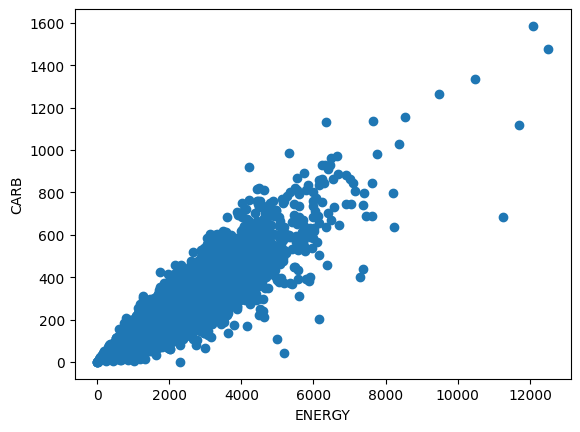

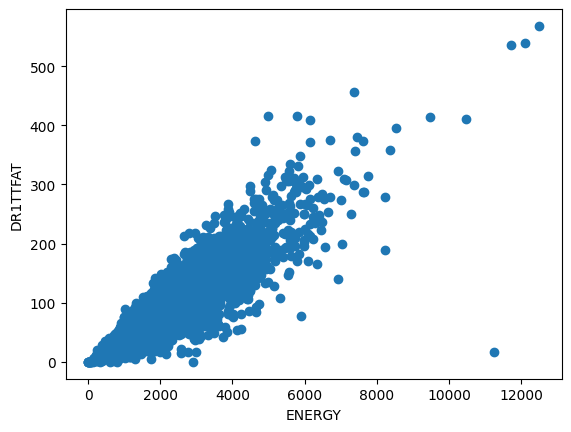

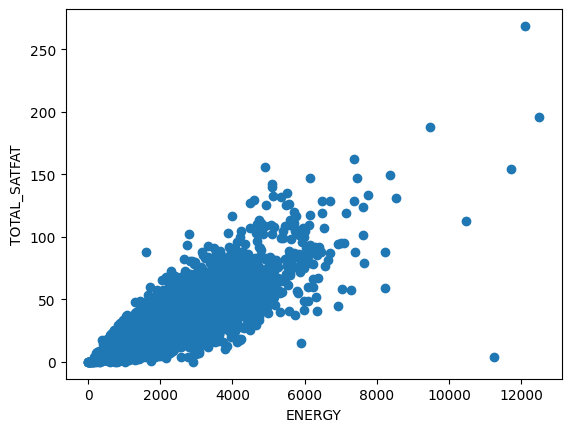

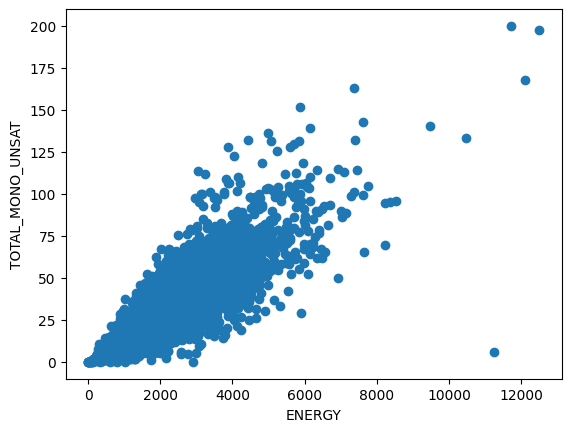

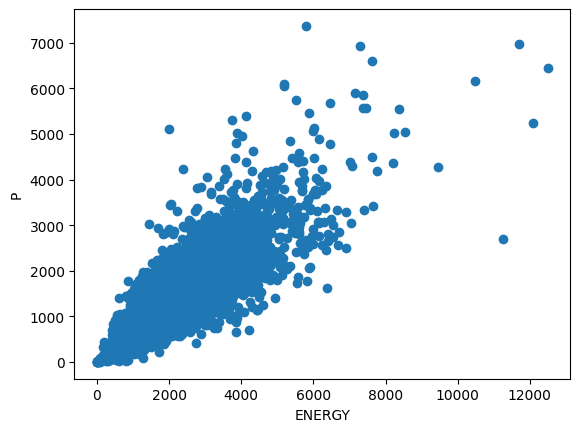

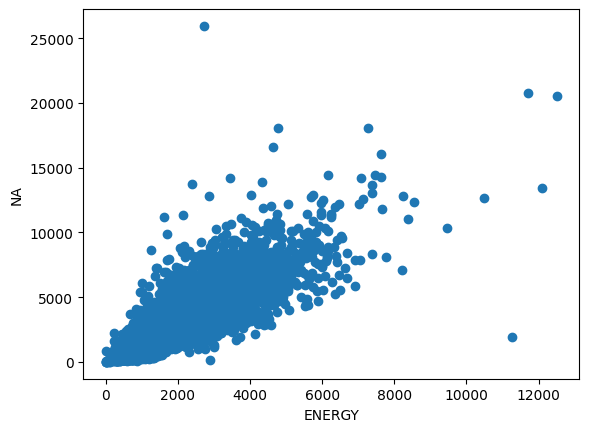

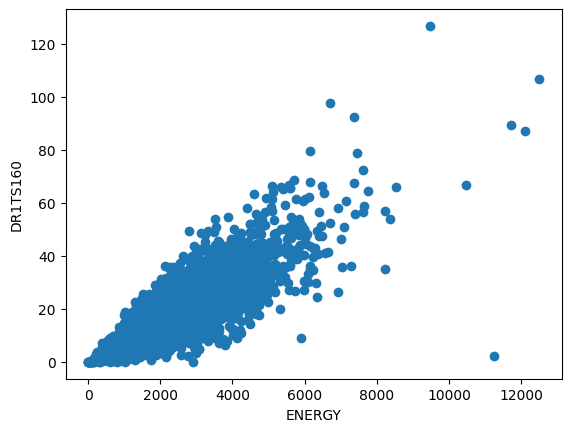

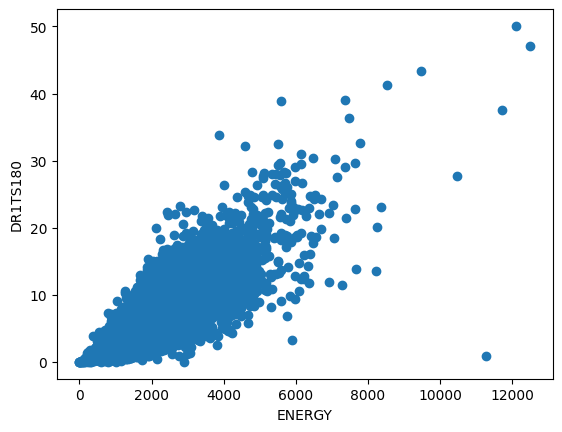

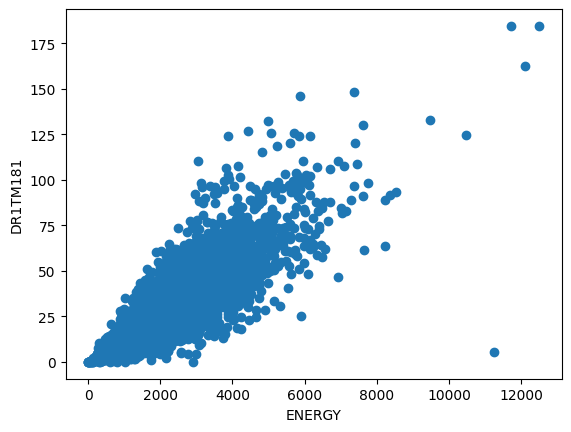

10


In [12]:
col = "ENERGY"

vals=heat[col][top[col]]

i=0
while(i<len(vals)):
    coll=heat[col][top[col]].index[i]
    plt.figure()
    if(col!=coll):
        plt.scatter(df[col],df[coll])
        plt.xlabel(col)
        plt.ylabel(coll)
    i+=1
print(col)
plt.show()
print(len(vals))


In [13]:
df_new.columns

Index(['SEQN', 'SALTFREQ', 'SPECIALDIET', 'DIET_WEIGHTLOSS_LOWCAL',
       'DIET_LOWFAT_LOWCAL', 'DIET_LOWSALT_LOWCAL', 'DIET_NOSUGAR_LOWSUGAR',
       'DIET_LOW_FIB', 'DIET_HIGH_FIB', 'DIET_DIEBETIC',
       'DIET_WEIGHTGAIN_MUSCLE', 'DIET_LOWCARB', 'DIET_HIGHPROTEIN',
       'DIET_GLUTFREE_CELIAC', 'DIET_RENAL_KIDNEY', 'DIET_OTHERSPECIAL',
       'ENERGY', 'PROTEIN', 'CARB', 'SUGAR', 'TOTAL_FAT', 'DR1TTFAT',
       'TOTAL_SATFAT', 'TOTAL_MONO_UNSAT', 'TOTAL_POLY_UNSAT', 'CHOLESERAL',
       'B12', 'ADDED_B12', 'VIT_C', 'VIT_D', 'VIT_K', 'CA', 'P', 'MG', 'FE',
       'ZN', 'NA', 'K', 'CAFFINE', 'ALCHOHOL', 'TOTAL_PLAIN_H2O',
       'TOTAL_TAP_H2O', 'TOTAL_BOTTLE_H2O', 'TAP_SOURCE', 'Shellfish_Eaten',
       'Clams_Eaten', 'Crabs_Eaten', 'Crayfish_Eaten', 'Lobster_Eaten',
       'Mussels_Eaten', 'Oysters_Eaten', 'Scallops_Eaten', 'Shrimp_Eaten',
       'Other_Shellfish_Eaten', 'Unknown_Shellfish_Eaten', 'Refused_To_Eaten',
       'Fish_Eaten', 'Breaded_Fish_Eaten', 'Tuna_Eaten', 'Bass_

In [14]:
Income_level = df_new.groupby(pd.cut(df_new["INCOME"], [0, 1, 2, 3, 4, 5]))


In [15]:
df["SPECIALDIET"].replace([1,2,9],[1,None,None],inplace=True)
df['INCOME_GROUP']=pd.cut(df['INCOME'], bins=[0,1,2,3,4,5,6])
df['AGEYR_GROUP']=pd.cut(df['AGE_YEAR'], bins=[0,10,20,30,40,50,60,70,80,90,100,110])
df['MARITAL'].replace([1,2,3,77,99],["Married","Separated","Never Married",None,None],inplace=True)
df['PREGNANT'].replace([1,2,3],["Yes","No","No"],inplace=True)
df['GENDER'].replace([1,2],["Male","Female"],inplace=True)

In [29]:
group = ['GENDER','INCOME_GROUP', 'MARITAL', 'PREGNANT']
val=["PROTEIN"]
tablecount = pd.pivot_table(df[val+group],index=group,aggfunc="mean")
tablecount

PROTEIN
GENDER INCOME_GROUP MARITAL       PREGNANT            
Female (0, 1]       Married       No         74.697234
                                  Yes        72.746154
                    Never Married No         67.746710
                                  Yes        45.140000
                    Separated     No         63.384545
       (1, 2]       Married       No         72.387771
                                  Yes       100.167778
                    Never Married No         68.921639
                                  Yes        67.038000
                    Separated     No         69.991628
       (2, 3]       Married       No         69.704844
                                  Yes        78.187273
                    Never Married No         84.734375
                                  Yes       113.680000
                    Separated     No         54.051875
       (3, 4]       Married       No         70.245059
                                  Yes        74.718000
                    Never Married No         66.700943
                                  Yes       159.620000
                    Separated     No         72.713000
       (4, 5]       Married       No         69.928960
                                  Yes        82.459231
                    Never Married No         74.275753
                                  Yes        81.840000
                    Separated     No         63.625294
                                  Yes       113.420000

In [23]:
group = ['AGEYR_GROUP', 'GENDER']
val=["PROTEIN"]
tablecount = pd.pivot_table(df[val+group],index=group,aggfunc="mean")
tablecount

PROTEIN
AGEYR_GROUP GENDER           
(0, 10]     Female  62.616439
            Male    82.132798

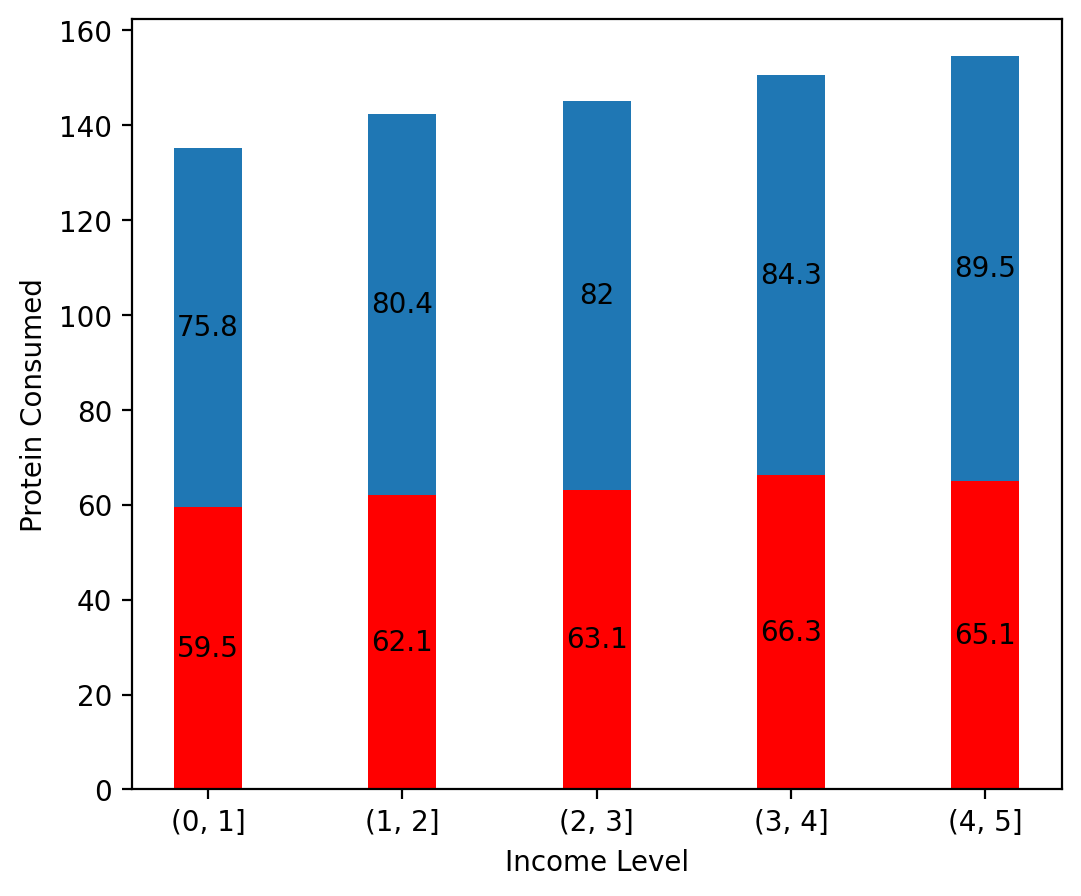

In [20]:
female = np.array([59.5, 62.1, 63.1, 66.3, 65.1])
male = np.array([75.8, 80.4, 82.0, 84.3, 89.5])
Income_Group = np.array(['(0, 1]','(1, 2]','(2, 3]','(3, 4]','(4, 5]'])

fig,ax = plt.subplots(figsize=(6,5), dpi=200)
 
width = 0.35   
ticks = Income_Group   
p = ax.bar(ticks, female, width, color = "r")
d = ax.bar(ticks, male, width, bottom=female)

ax.bar_label(p, label_type='center')
ax.bar_label(d, label_type='center')

ax.set_xlabel("Income Level")
ax.set_ylabel("Protein Consumed")
plt.show()

In [18]:
group = ['GENDER','INCOME_GROUP','MARITAL']
val=["PROTEIN","ENERGY"]
tablecount = pd.pivot_table(df[val+group],index=group,aggfunc="range")
tablecount

AttributeError: 'range' is not a valid function for 'DataFrameGroupBy' object

In [ ]:
df_fish_data=df_new.groupby("RACE").mean()[fish_dict].transpose()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60, 10]
df_fish_data.plot(kind="bar",ax=ax,rot=45)
ax.legend(["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other Race"])